# Dynamic MPNet Implemented for Dubins Vehicle Dynamics
ROB 498 Final Project - Marshall Vielmetti

## Setup Code

In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
from dubins import Dubins
import numpy as np
import matplotlib.pyplot as plt


## Sample Plot Using Dubins

Length of the path: 30
Length of the path: 25
Length of the path: 24
Length of the path: 26


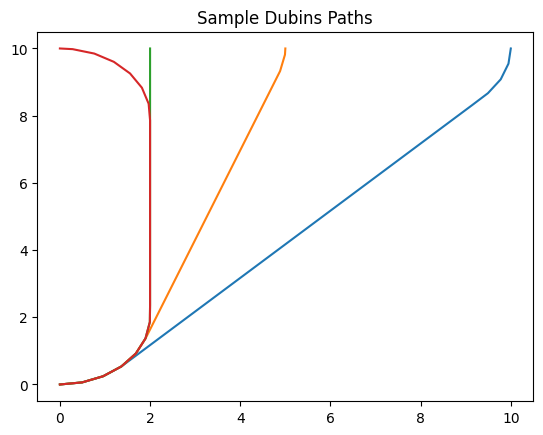

In [45]:
dubins_planner = Dubins(radius=2, point_separation=0.5)

start = (0, 0, 0)
end_one = (10, 10, np.pi / 2)
end_two = (5, 10, np.pi / 2)
end_three = (2, 10, np.pi / 2)
end_four = (0, 10, -np.pi)

ends = [
    end_one, end_two, end_three, end_four
]

for end in ends:
    path, _ = dubins_planner.dubins_path(start, end)
    print(f"Length of the path: {len(path)}")
    plt.plot(path[:, 0], path[:, 1])

plt.title("Sample Dubins Paths")
plt.show()

## Sample of the Environment

Text(0.5, 1.0, 'Static Environment')

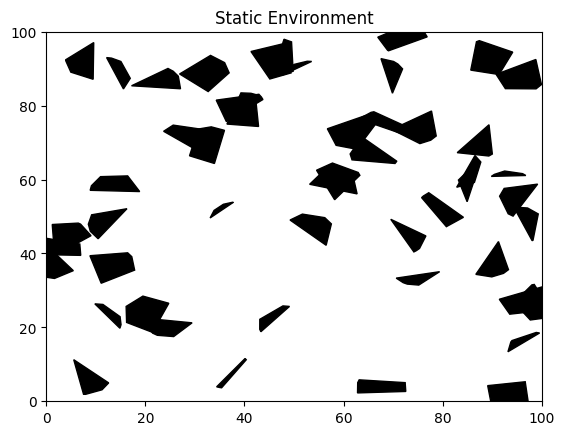

In [46]:
from environment import StaticEnvironment

env = StaticEnvironment((100, 100), 50)
env.plot()
plt.title("Static Environment")

## Plan a Dubins Path using RRT Primitives

Run: Num_iterations = 100, Goal = None
Iteration 1/100
Random Point: (11.644046778976392, 25.998907703691142, 5.046455361195934)
Steer: x_nearest = (0, 0, 0), x_rand = (11.644046778976392, 25.998907703691142, 5.046455361195934)
	 Path of Length 32.78952264877698
	 Sampled Point: [3.6660116  8.65778033]
	 New Point: (3.66601159830349, 8.657780325739806, 1.333745784022073)
Iteration 2/100
Random Point: (52.86200070012603, 2.8640456750753884, 3.644711931551953)
Steer: x_nearest = (0, 0, 0), x_rand = (52.86200070012603, 2.8640456750753884, 3.644711931551953)
	 Path of Length 57.596030595501944
	 Sampled Point: [9.92030555 1.25459958]
	 New Point: (9.920305546573644, 1.254599584924192, 0.12742152664077108)
get_near_nodes
	Num Nearest: 0
Iteration 3/100
Random Point: (68.00466963617062, 97.49433089651518, 1.518247003751432)
Steer: x_nearest = (9.920305546573644, 1.254599584924192, 0.12742152664077108), x_rand = (68.00466963617062, 97.49433089651518, 1.518247003751432)
	 Path of Length 112.68

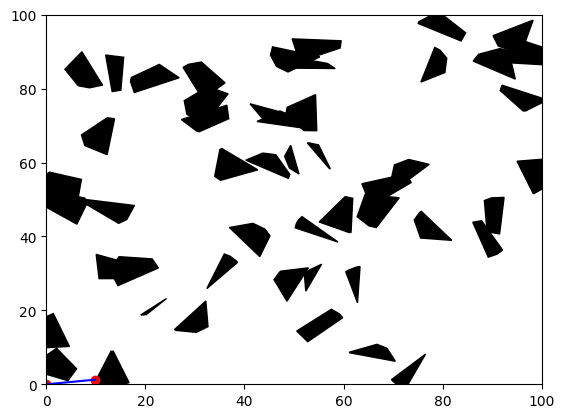

In [76]:
from rrt import DubinsRRT

# Create an environment
env = StaticEnvironment((100, 100), 50)
rrt = DubinsRRT(env, radius=2, debug=True)

# Define start and goal points
start = (0, 0, 0)
goal = (50, 50, np.pi / 2)

# Plan a path
rrt.set_start(start)
success = rrt.run()

rrt.plot()
plt.show()


## Repeatable Test for More Iterations

Define an envirnoment in the cell below, then the cell underneath can be run repeatedly to evaluate performance

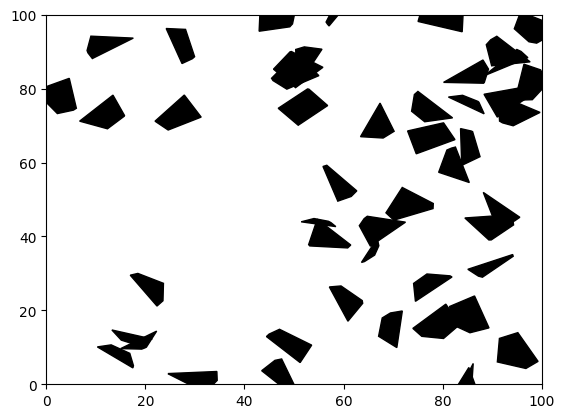

In [60]:
# Create an environment
repeatable_env = StaticEnvironment((100, 100), 20)
repeatable_rrt = DubinsRRT(env, radius=2, debug=True)
repeatable_rrt.set_start(start)

env.plot()

Run: Num_iterations = 1000, Goal = None
Iteration 1/1000
Random Point: (74.32558879383718, 36.77308094434839, 3.8720410998998513)
Steer: x_nearest = (72.28410065900933, 35.13517372731162, -0.6096581082452236), x_rand = (74.32558879383718, 36.77308094434839, 3.8720410998998513)
	 Path of Length 11.646825673038682
	 Sampled Point Index: 20
	 Sampled Point: [75.84565736 37.27469424]
	 New Point: (75.84565735612631, 37.27469424453523, 2.923628263380502)
Iteration 2/1000
Random Point: (30.433406617930824, 4.822633971269951, 1.3079241453573784)
Steer: x_nearest = (32.7019195456267, 6.564060772169734, 1.3270831525855467), x_rand = (30.433406617930824, 4.822633971269951, 1.3079241453573784)
	 Path of Length 15.357792118778363
	 Sampled Point Index: 20
	 Sampled Point: [26.5419085   4.94534976]
	 New Point: (26.54190850270339, 4.945349760267417, -1.495971914031806)
Iteration 3/1000
Random Point: (55.56267507424325, 29.88029926530269, 5.380677613116186)
Steer: x_nearest = (55.25624705765581, 30.

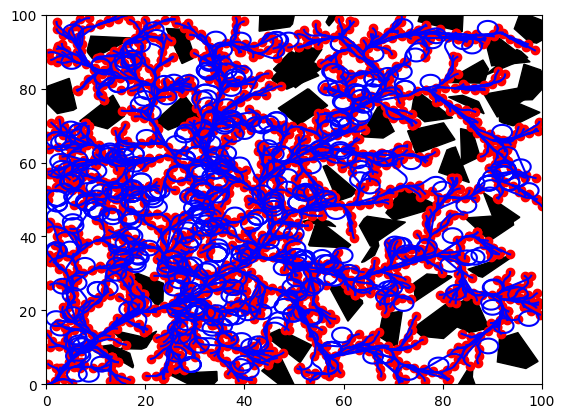

In [65]:
success = repeatable_rrt.run(num_iterations=1000)
rrt.plot()

### Plot Best Found Path
Using the rrt generated in the above cell, find the best path it found to (near) a point

Best Path Length: 144.4713412254532
Best Path: [[2.44929360e-16 0.00000000e+00]
 [4.94807919e-01 6.21751566e-02]
 [9.58851077e-01 2.44834876e-01]
 [1.36327752e+00 5.36622262e-01]
 [1.68294197e+00 9.19395388e-01]
 [1.91559934e+00 1.36162292e+00]
 [2.13738620e+00 1.80974186e+00]
 [2.35917307e+00 2.25786080e+00]
 [2.58095993e+00 2.70597975e+00]
 [2.80274680e+00 3.15409869e+00]
 [3.02453367e+00 3.60221763e+00]
 [3.24632053e+00 4.05033657e+00]
 [3.46810740e+00 4.49845551e+00]
 [3.68989426e+00 4.94657446e+00]
 [3.91168113e+00 5.39469340e+00]
 [4.13346799e+00 5.84281234e+00]
 [4.35525486e+00 6.29093128e+00]
 [4.57704172e+00 6.73905022e+00]
 [4.79882859e+00 7.18716917e+00]
 [5.02061546e+00 7.63528811e+00]
 [5.24240232e+00 8.08340705e+00]
 [5.46418919e+00 8.53152599e+00]
 [5.68597605e+00 8.97964493e+00]
 [5.90776292e+00 9.42776388e+00]
 [6.12954978e+00 9.87588282e+00]
 [6.35133665e+00 1.03240018e+01]
 [6.57312352e+00 1.07721207e+01]
 [6.79491038e+00 1.12202396e+01]
 [7.01669725e+00 1.16683586e+

Text(0.5, 1.0, 'Best Path Found')

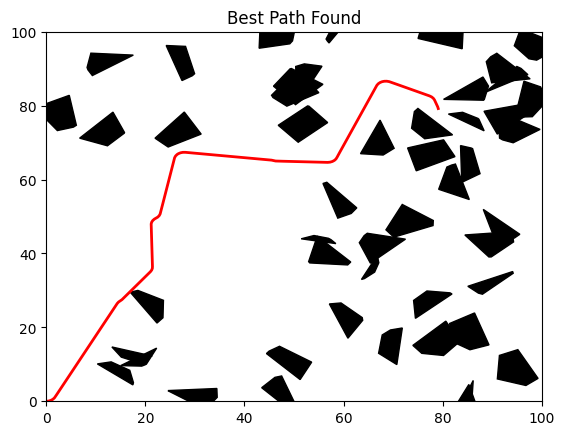

In [66]:
goal = (80, 80, 0)
best_path, path_length = repeatable_rrt.get_best_path(goal)

print(f"Best Path Length: {path_length}")

print(f"Best Path: {best_path}")

repeatable_rrt.env.plot()
plt.plot(best_path[:, 0], best_path[:, 1], color='red', linewidth=2)
plt.title("Best Path Found")



## Best Path Improves As # Iterations Increases
Runs the algorithm, intermittently adds the current best path to the plot

Iteration 1/20
Run: Num_iterations = 100, Goal = (19, 19, 0)
	Best Path Length: 17.294831474665735
Iteration 2/20
Run: Num_iterations = 100, Goal = (19, 19, 0)
	Best Path Length: 27.50577237595175
Iteration 3/20
Run: Num_iterations = 100, Goal = (19, 19, 0)
	Best Path Length: 27.50577237595175
Iteration 4/20
Run: Num_iterations = 100, Goal = (19, 19, 0)
	Best Path Length: 27.50577237595175
Iteration 5/20
Run: Num_iterations = 100, Goal = (19, 19, 0)
	Best Path Length: 27.50577237595175
Iteration 6/20
Run: Num_iterations = 100, Goal = (19, 19, 0)
	Best Path Length: 27.50577237595175
Iteration 7/20
Run: Num_iterations = 100, Goal = (19, 19, 0)
	Best Path Length: 27.50577237595175
Iteration 8/20
Run: Num_iterations = 100, Goal = (19, 19, 0)
	Best Path Length: 27.50577237595175
Iteration 9/20
Run: Num_iterations = 100, Goal = (19, 19, 0)


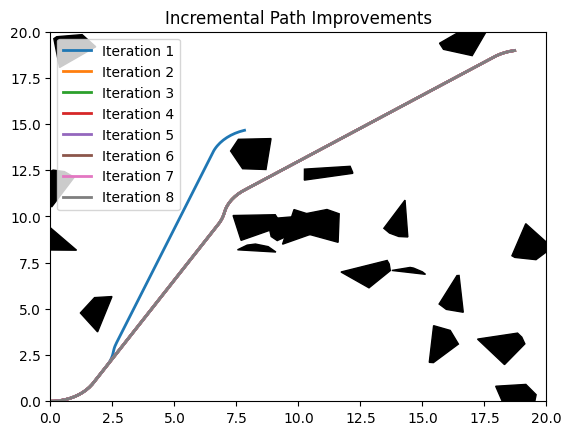

In [169]:
incremental_env = StaticEnvironment((20, 20), nb_obstacles=20)
incremental_rrt = DubinsRRT(incremental_env, radius=2)

start = (0, 0, 0)
incremental_rrt.set_start(start)

goal = (19, 19, 0)

num_improvements = 20

same_iters = 0
prev = -1

incremental_rrt.env.plot()
for i in range(num_improvements):
    print(f"Iteration {i + 1}/{num_improvements}")
    incremental_rrt.run(goal=goal, num_iterations=100)
    best_path, path_length = incremental_rrt.get_best_path(goal)
    
    if path_length - prev < 0.1:
        same_iters += 1
        if (same_iters > 6):
            break
    else:
        prev = path_length
        same_iters = 0


    print(f"\tBest Path Length: {path_length}")
    plt.plot(best_path[:, 0], best_path[:, 1], linewidth=2, label=f"Iteration {i + 1}")


plt.title("Incremental Path Improvements")
plt.legend()
plt.show()

Run: Num_iterations = 100, Goal = (5, 5, 0)
Run: Num_iterations = 100, Goal = (10, 10, 0)
Run: Num_iterations = 100, Goal = (15, 15, 0)
Run: Num_iterations = 100, Goal = (5, 15, 0)
Run: Num_iterations = 100, Goal = (15, 5, 0)
Run: Num_iterations = 100, Goal = (15, 10, 0)
Run: Num_iterations = 100, Goal = (10, 5, 0)
Run: Num_iterations = 100, Goal = (10, 15, 0)
Run: Num_iterations = 100, Goal = (5, 10, 0)
Run: Num_iterations = 100, Goal = (0, 0, 0)
Run: Num_iterations = 100, Goal = (19, 19, 0)


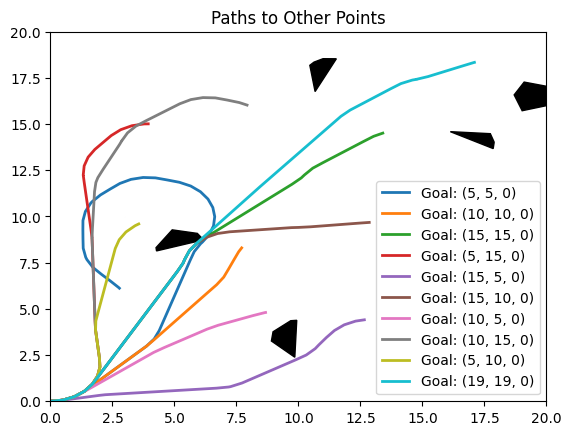

In [130]:
other_points = [
    (5, 5, 0),
    (10, 10, 0),
    (15, 15, 0),
    (5, 15, 0),
    (15, 5, 0),
    (15, 10, 0),
    (10, 5, 0),
    (10, 15, 0),
    (5, 10, 0),
    (0, 0, 0),
    (19, 19, 0)
]

incremental_rrt.env.plot()
for point in other_points:
    # run some additional iterations for each point
    incremental_rrt.run(goal=point, num_iterations=100)
    best_path, path_length = incremental_rrt.get_best_path(point)
    if path_length == 0:
        continue

    plt.plot(best_path[:, 0], best_path[:, 1], linewidth=2, label=f"Goal: {point}")


plt.legend()
plt.title("Paths to Other Points")
plt.show()



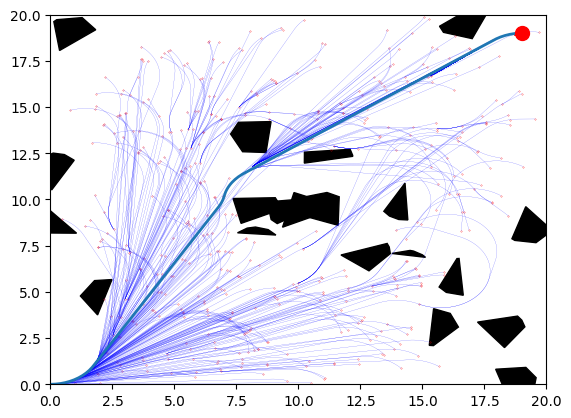

In [171]:
incremental_rrt.plot()

best_path, path_length = incremental_rrt.get_best_path(goal)
plt.plot(best_path[:, 0], best_path[:, 1], linewidth=2, label=f"Iteration {i + 1}")
plt.plot(19, 19, 'ro', markersize=10, label="Goal")

## Occupancy Grid Generator
Sample random occupancy grids with given dimensions and # of obstacles

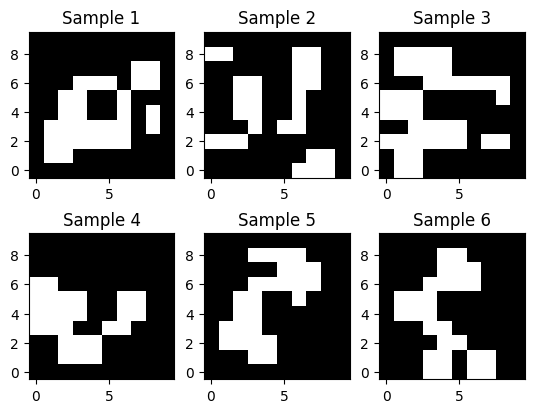

In [ ]:
from occupancy_grid_generator import OccupancyGridGenerator

occupancy_grid_generator = OccupancyGridGenerator((10, 10), 10)

# sample = occupancy_grid_generator.sample()

# Generate six samples
for i in range(6):
    sample = occupancy_grid_generator.sample()
    plt.subplot(2, 3, i + 1)
    plt.title(f"Sample {i + 1}")
    plt.imshow(sample, cmap='', origin='lower')

# plt.imshow(sample, cmap='gray', origin='lower')

# np.save("maps/occupancy_grid.npy", sample)

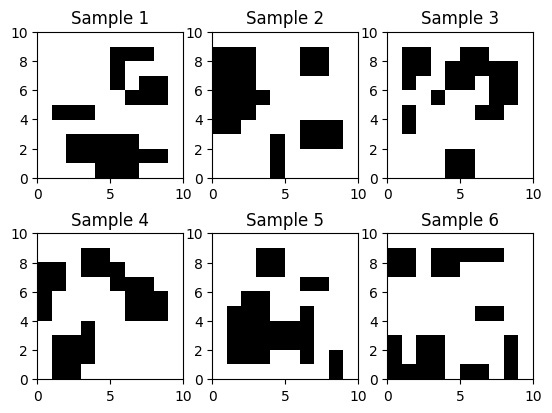

In [ ]:
from grid_environment import GridEnvironment

for i in range(6):
    sampled_grid = occupancy_grid_generator.sample()
    grid_env = GridEnvironment(sampled_grid)
    plt.subplot(2, 3, i + 1)
    plt.title(f"Sample {i + 1}")
    grid_env.plot(display=False)

plt.show()

sampled_grid = np.load("maps/grid_0_10x10_5.npy")
grid_env = GridEnvironment(sampled_grid)
grid_env.plot()

## Using Grid Environment with RRT

Run: Num_iterations = 1000, Goal = (0, 10, 1.5707963267948966)
Iteration 100/1000
Iteration 200/1000
Iteration 300/1000
Iteration 400/1000
Iteration 500/1000
Iteration 600/1000
Iteration 700/1000
Iteration 800/1000
Iteration 900/1000
Iteration 1000/1000


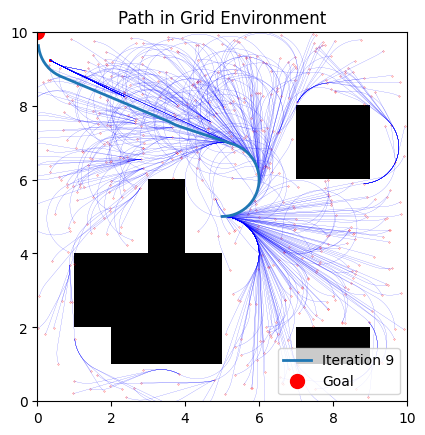

In [215]:
sampled_grid = np.load("maps/grid_5_10x10_5.npy")
grid_env = GridEnvironment(sampled_grid)
grid_env.plot()

start = (5, 5, 0)
goal = (0, 10, np.pi / 2)

grid_rrt = DubinsRRT(grid_env, radius=1)

grid_rrt.set_start(start)
success = grid_rrt.run(goal=goal, num_iterations=1000)
best_path, path_length = grid_rrt.get_best_path(goal)

grid_rrt.plot()
plt.plot(best_path[:, 0], best_path[:, 1], linewidth=2, label=f"Iteration {i + 1}")
plt.plot(goal[0], goal[1], 'ro', markersize=10, label="Goal")
plt.legend()
plt.title("Path in Grid Environment")
plt.show()


## Encoder / Decoder Training
As the first part of Dynamic MPNet, we are required to train an encoder/decoder on a map.

In this part, I train a CNN Autoencoder, to compress a 12x12 OGM down to some *latent_dimension* representation

While we only care about the encoder, in order to train the encoder we must also train a decoder, so that we can have a meaningful loss function for the encoder. We will end up throwing away the decoder after training.

The autoencoder will be trained on ~1000 sample grids generated using the map_generator

In [347]:
from map_encoder import CNNEncoder, CNNDecoder, get_data_loaders, train_autoencoder
from torch import Tensor

LATENT_DIM = 32

encoder = CNNEncoder((12, 12), LATENT_DIM)
decoder = CNNDecoder((12, 12), LATENT_DIM)


train_loader, val_loader = get_data_loaders(folder="maps")

LR = 1e-4
NUM_EPOCHS = 200
train_losses, val_losses = train_autoencoder(
    encoder,
    decoder,
    train_loader,
    val_loader,
    lr=LR,
    num_epochs=NUM_EPOCHS
)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

axes[0].plot(train_losses, label='Train Loss')
axes[0].grid()
axes[0].set_title('Train Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Train Loss')
axes[0].set_yscale('log')

axes[1].plot(val_losses, label='Validation Loss')
axes[1].set_title('Val Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Val Loss')
axes[1].set_yscale('log')



# sampled_grid = np.load("maps/grid_5_10x10_5.npy")

# Center the sampled grid in a 20x20 grid of ones
# padded_grid = np.ones((20, 20))
# x, y = sampled_grid.shape
# x_offset = (20 - x) // 2
# y_offset = (20 - y) // 2
# padded_grid[x_offset:x_offset + x, y_offset:y_offset + y] = sampled_grid
# sampled_grid = padded_grid

# sampled_grid_tensor = Tensor(sampled_grid)
# sampled_grid_tensor = sampled_grid_tensor.unsqueeze(0).unsqueeze(0) # Add batch dimension


# print(f"Sampled grid shape: {sampled_grid_tensor.shape}")

# encoded = encoder(sampled_grid_tensor)

# print(f"Encoded shape: {encoded.shape}")

# decoded = decoder(encoded)

plt.show()

flattened size:  3200
Loading maps from maps...
Train size: 4000, Validation size: 1000
Train dataset: <torch.utils.data.dataset.Subset object at 0x17795c530>, Validation dataset: <torch.utils.data.dataset.Subset object at 0x17795c590>
Epoch 1/200 | Train Loss: 0.1801 | Val Loss: 0.1284
Epoch 51/200 | Train Loss: 0.0124 | Val Loss: 0.0163


KeyboardInterrupt: 

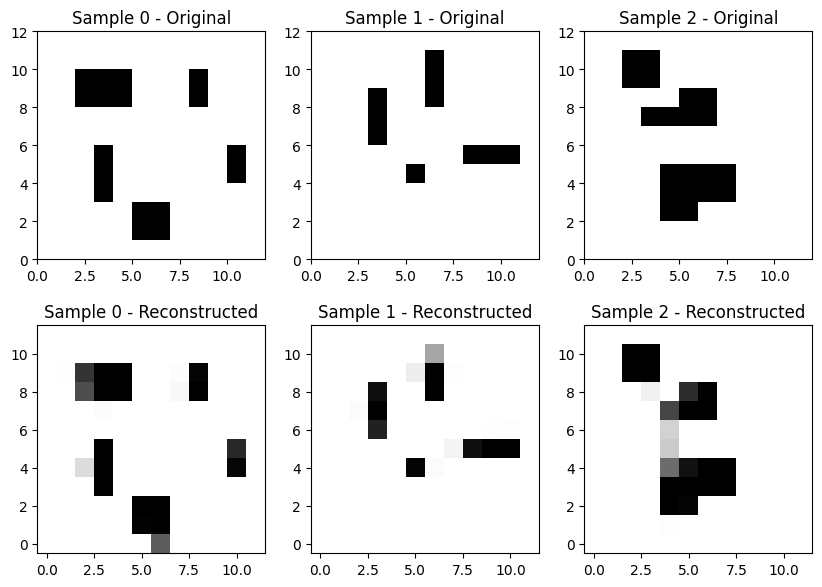

In [349]:
# test the encoder and decoder

gen = OccupancyGridGenerator((12, 12), 5)

# for i in range(6):
#     sampled_grid = occupancy_grid_generator.sample()
#     grid_env = GridEnvironment(sampled_grid)
#     plt.subplot(2, 3, i + 1)
#     plt.title(f"Sample {i + 1}")
#     grid_env.plot(display=False)

plt.figure(figsize=(10, 7))

# Generate 3 samples, run through encoder/decoder, and plot side by side
for i in range(3):
    sampled_grid = gen.sample()
    grid_env = GridEnvironment(sampled_grid)
    plt.subplot(2, 3, i+1)
    plt.title(f"Sample {i} - Original")
    grid_env.plot(display=False)

    sampled_grid_tensor = Tensor(sampled_grid)
    sampled_grid_tensor = sampled_grid_tensor.unsqueeze(0).unsqueeze(0) # Add batch dimension

    # Run the encoder
    encoded = encoder(sampled_grid_tensor)
    decoded = decoder(encoded)

    decoded = decoded.squeeze(0).squeeze(0) # Remove batch dimension
    decoded = decoded.detach().cpu().numpy()

    decoded = np.clip(decoded, 0, 1) # Clip values to [0, 1] range
    decoded = decoded.T

    # decoded = np.where(decoded > 0.3, 1, 0) # Binarize the output
    

    plt.subplot(2, 3, 4 + i)
    plt.imshow(decoded, cmap='gray_r', origin='lower')
    plt.title(f"Sample {i} - Reconstructed")


# sampled_grid = gen.sample()

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
# axes[0].imshow(sampled_grid, cmap='gray_r', origin='lower')
# axes[1].imshow(decoded, cmap='gray_r', origin='lower')

plt.show()


## Variational Autoencoder

In [369]:
from map_encoder import CNNDecoder, get_data_loaders, train_autoencoder
from map_variational_autoencoder import VariationalEncoder
from torch import Tensor

LATENT_DIM = 32

encoder = VariationalEncoder((12, 12), LATENT_DIM)
decoder = CNNDecoder((12, 12), LATENT_DIM)


train_loader, val_loader = get_data_loaders(folder="maps")

LR = 1e-4
NUM_EPOCHS = 100
train_losses, val_losses = train_autoencoder(
    encoder,
    decoder,
    train_loader,
    val_loader,
    lr=LR,
    num_epochs=NUM_EPOCHS
)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

axes[0].plot(train_losses, label='Train Loss')
axes[0].grid()
axes[0].set_title('Train Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Train Loss')
axes[0].set_yscale('log')

axes[1].plot(val_losses, label='Validation Loss')
axes[1].set_title('Val Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Val Loss')
axes[1].set_yscale('log')

flattened size:  3200
Loading maps from maps...
Train size: 3200, Validation size: 800
Train dataset: <torch.utils.data.dataset.Subset object at 0x30ca48890>, Validation dataset: <torch.utils.data.dataset.Subset object at 0x169fed610>
Epoch 0/100 | Train Loss: 0.2385 | Val Loss: 0.1913
Epoch 10/100 | Train Loss: 0.0974 | Val Loss: 0.0948
Epoch 20/100 | Train Loss: 0.0557 | Val Loss: 0.0568
Epoch 30/100 | Train Loss: 0.0422 | Val Loss: 0.0457
Epoch 40/100 | Train Loss: 0.0354 | Val Loss: 0.0393
Epoch 50/100 | Train Loss: 0.0314 | Val Loss: 0.0361
Epoch 60/100 | Train Loss: 0.0288 | Val Loss: 0.0343
Epoch 70/100 | Train Loss: 0.0268 | Val Loss: 0.0333
Epoch 80/100 | Train Loss: 0.0253 | Val Loss: 0.0327
Epoch 90/100 | Train Loss: 0.0239 | Val Loss: 0.0323


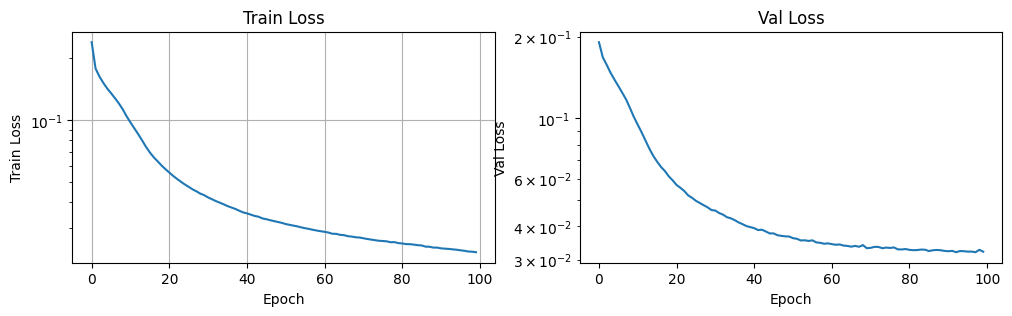

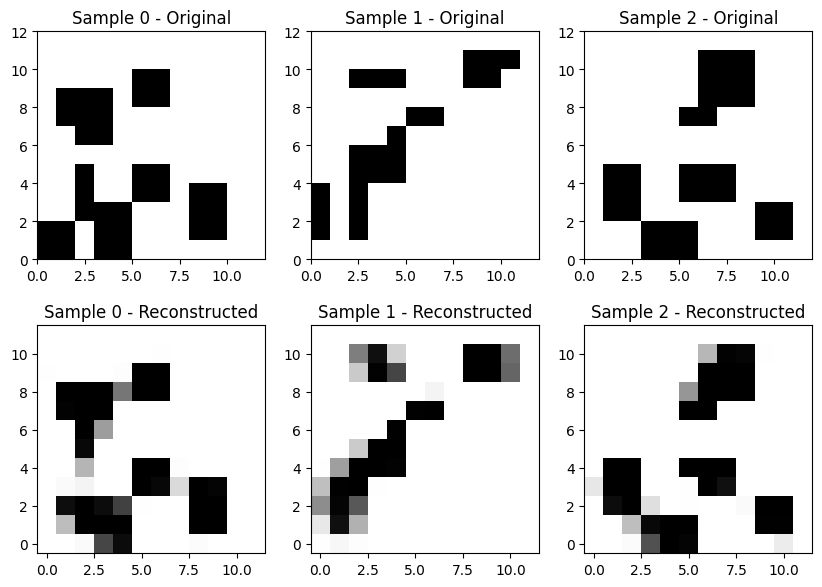

In [370]:
gen = OccupancyGridGenerator((12, 12), 8)

plt.figure(figsize=(10, 7))

# Generate 3 samples, run through encoder/decoder, and plot side by side
for i in range(3):
    sampled_grid = gen.sample()
    grid_env = GridEnvironment(sampled_grid)
    plt.subplot(2, 3, i+1)
    plt.title(f"Sample {i} - Original")
    grid_env.plot(display=False)

    sampled_grid_tensor = Tensor(sampled_grid)
    sampled_grid_tensor = sampled_grid_tensor.unsqueeze(0).unsqueeze(0) # Add batch dimension

    # Run the encoder
    encoded = encoder(sampled_grid_tensor)
    decoded = decoder(encoded)

    decoded = decoded.squeeze(0).squeeze(0) # Remove batch dimension
    decoded = decoded.detach().cpu().numpy()

    decoded = np.clip(decoded, 0, 1) # Clip values to [0, 1] range
    decoded = decoded.T

    plt.subplot(2, 3, 4 + i)
    plt.imshow(decoded, cmap='gray_r', origin='lower')
    plt.title(f"Sample {i} - Reconstructed")

plt.show()

## Sampling from VAE Latent Space

Shape of cov: (32, 32)
Shape of cov: (32, 32)


/var/folders/gt/xy7478j5691bnzg5djmd8m400000gn/T/ipykernel_40576/3611681147.py:36: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  z = np.random.multivariate_normal(mean, cov)


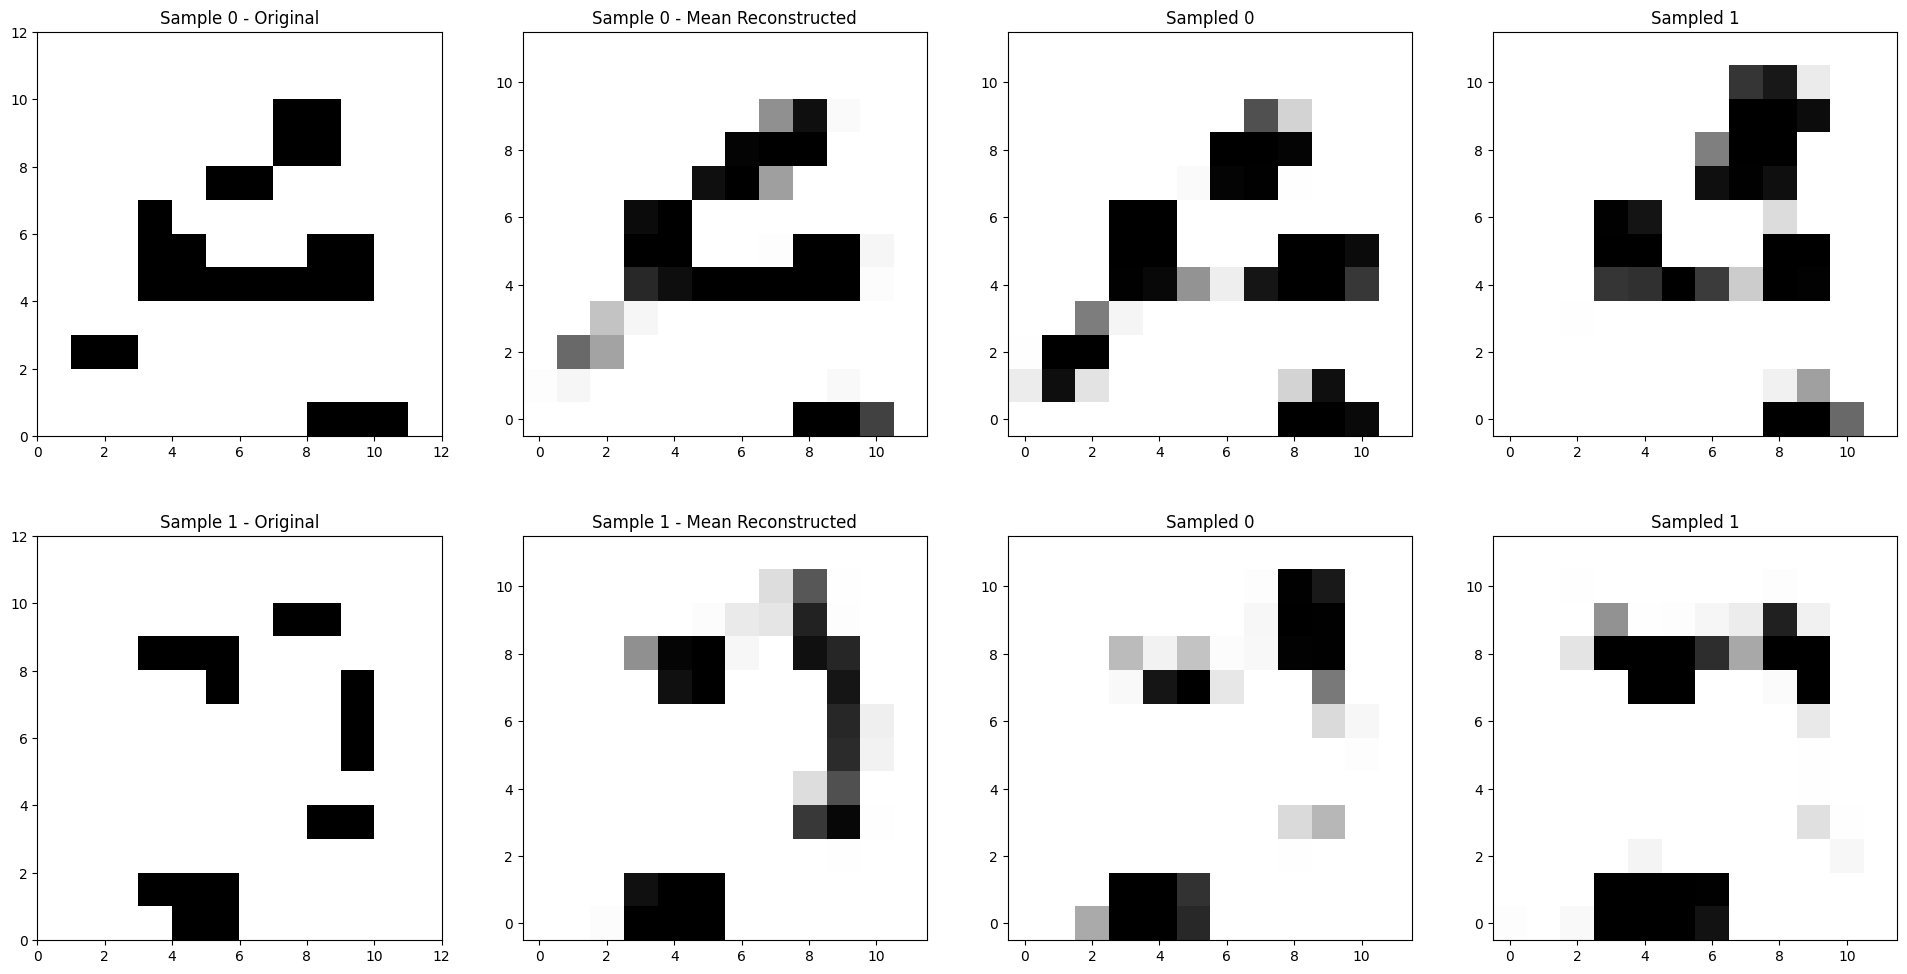

In [371]:
gen = OccupancyGridGenerator((12, 12), 8)

plt.figure(figsize=(24, 12))

# Generate 2 samples, generate sample 3 elements from latent space, and decode
for i in range(2):
    sampled_grid = gen.sample()
    grid_env = GridEnvironment(sampled_grid)
    plt.subplot(2, 4, (4*i)+1)
    plt.title(f"Sample {i} - Original")
    grid_env.plot(display=False)

    sampled_grid_tensor = Tensor(sampled_grid)
    sampled_grid_tensor = sampled_grid_tensor.unsqueeze(0).unsqueeze(0) # Add batch dimension

    mean, cov = encoder.predict(sampled_grid_tensor)

    mean_decoded = decoder(mean)
    mean_decoded = mean_decoded.squeeze(0).squeeze(0) # Remove batch dimension
    mean_decoded = mean_decoded.detach().cpu().numpy()
    mean_decoded = np.clip(mean_decoded, 0, 1) # Clip values to [0, 1] range
    mean_decoded = mean_decoded.T
    plt.subplot(2, 4, (4*i)+2)
    plt.imshow(mean_decoded, cmap='gray_r', origin='lower')
    plt.title(f"Sample {i} - Mean Reconstructed")


    mean = mean.squeeze(0).squeeze(0).detach().cpu().numpy()
    cov = cov.squeeze(0).squeeze(0).detach().cpu().numpy()
    cov = np.diag(cov)

    print(f"Shape of cov: {cov.shape}")

    for j in range(2):
        # Sample from the latent space
        z = np.random.multivariate_normal(mean, cov)

        # Decode the latent space sample
        z_tensor = Tensor(z)
        z_tensor = z_tensor.unsqueeze(0).unsqueeze(0)

        # Run the decoder
        decoded = decoder(z_tensor) 
        decoded = decoded.squeeze(0).squeeze(0)
        decoded = decoded.detach().cpu().numpy()

        decoded = np.clip(decoded, 0, 1) # Clip values to [0, 1] range
        decoded = decoded.T
        plt.subplot(2, 4, (4*i) + j + 3)
        plt.imshow(decoded, cmap='gray_r', origin='lower')
        plt.title(f"Sampled {j}")


plt.show()

## Training VAE With Varying Latent Space Dimensions

flattened size:  3200
flattened size:  3200
flattened size:  3200
flattened size:  3200
flattened size:  3200
Loading maps from maps...
Train size: 3200, Validation size: 800
Train dataset: <torch.utils.data.dataset.Subset object at 0x1761081d0>, Validation dataset: <torch.utils.data.dataset.Subset object at 0x17610bd10>
Training encoder and decoder with latent size 8
Epoch 0/100 | Train Loss: 0.2688 | Val Loss: 0.2266
Epoch 10/100 | Train Loss: 0.0902 | Val Loss: 0.0901
Epoch 20/100 | Train Loss: 0.0815 | Val Loss: 0.0826
Epoch 30/100 | Train Loss: 0.0763 | Val Loss: 0.0781
Epoch 40/100 | Train Loss: 0.0731 | Val Loss: 0.0759
Epoch 50/100 | Train Loss: 0.0707 | Val Loss: 0.0745
Epoch 60/100 | Train Loss: 0.0685 | Val Loss: 0.0714
Epoch 70/100 | Train Loss: 0.0668 | Val Loss: 0.0706
Epoch 80/100 | Train Loss: 0.0649 | Val Loss: 0.0694
Epoch 90/100 | Train Loss: 0.0632 | Val Loss: 0.0679
Finished training encoder and decoder with latent size 8
Training encoder and decoder with latent si

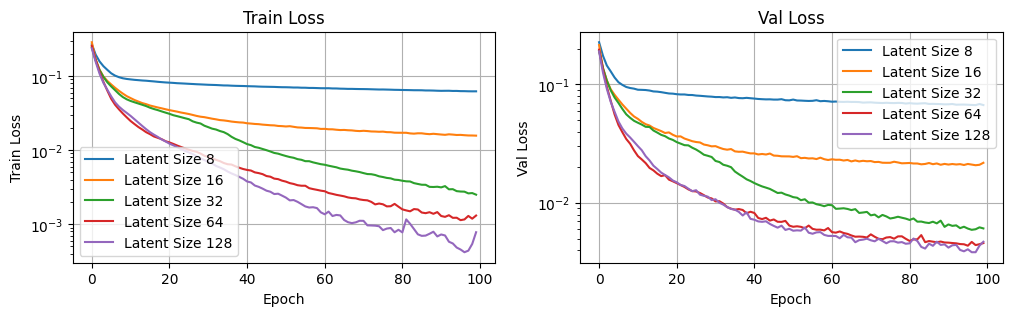

In [382]:

LATENT_SIZES = [8, 16, 32, 64, 128]
LR = 1e-4
NUM_EPOCHS = 100

encoders = []
decoders = []

# Construct the encoders and decoders
for latent_size in LATENT_SIZES:
    encoder = VariationalEncoder((12, 12), latent_size)
    decoder = CNNDecoder((12, 12), latent_size)
    encoders.append(encoder)
    decoders.append(decoder)

# Train the encoders and decoders
train_loader, val_loader = get_data_loaders(folder="maps")
train_losses = []
val_losses = []

for i, (encoder, decoder) in enumerate(zip(encoders, decoders)):
    print(f"Training encoder and decoder with latent size {LATENT_SIZES[i]}")

    train_loss, val_loss = train_autoencoder(
        encoder,
        decoder,
        train_loader,
        val_loader,
        lr=LR,
        num_epochs=NUM_EPOCHS
    )
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Finished training encoder and decoder with latent size {LATENT_SIZES[i]}")


# Plot the train and validation losses on the same graph
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
for i, latent_size in enumerate(LATENT_SIZES):
    axes[0].plot(train_losses[i], label=f'Latent Size {latent_size}')
    axes[1].plot(val_losses[i], label=f'Latent Size {latent_size}')
axes[0].grid()
axes[0].set_title('Train Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Train Loss')
axes[0].set_yscale('log')
axes[0].legend()

axes[1].grid()
axes[1].set_title('Val Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Val Loss')
axes[1].set_yscale('log')
axes[1].legend()

plt.show()

In [383]:
import os

# Save Models
for i, latent_size in enumerate(LATENT_SIZES):
    enc_save_path = os.path.join(os.getcwd(), f"models/big_obs_encoder_{latent_size}.pth")
    dec_save_path = os.path.join(os.getcwd(), f"models/big_obs_decoder_{latent_size}.pth")
    torch.save(encoders[i].state_dict(), enc_save_path)
    torch.save(decoders[i].state_dict(), dec_save_path)

flattened size:  3200
flattened size:  3200
flattened size:  3200
flattened size:  3200
flattened size:  3200


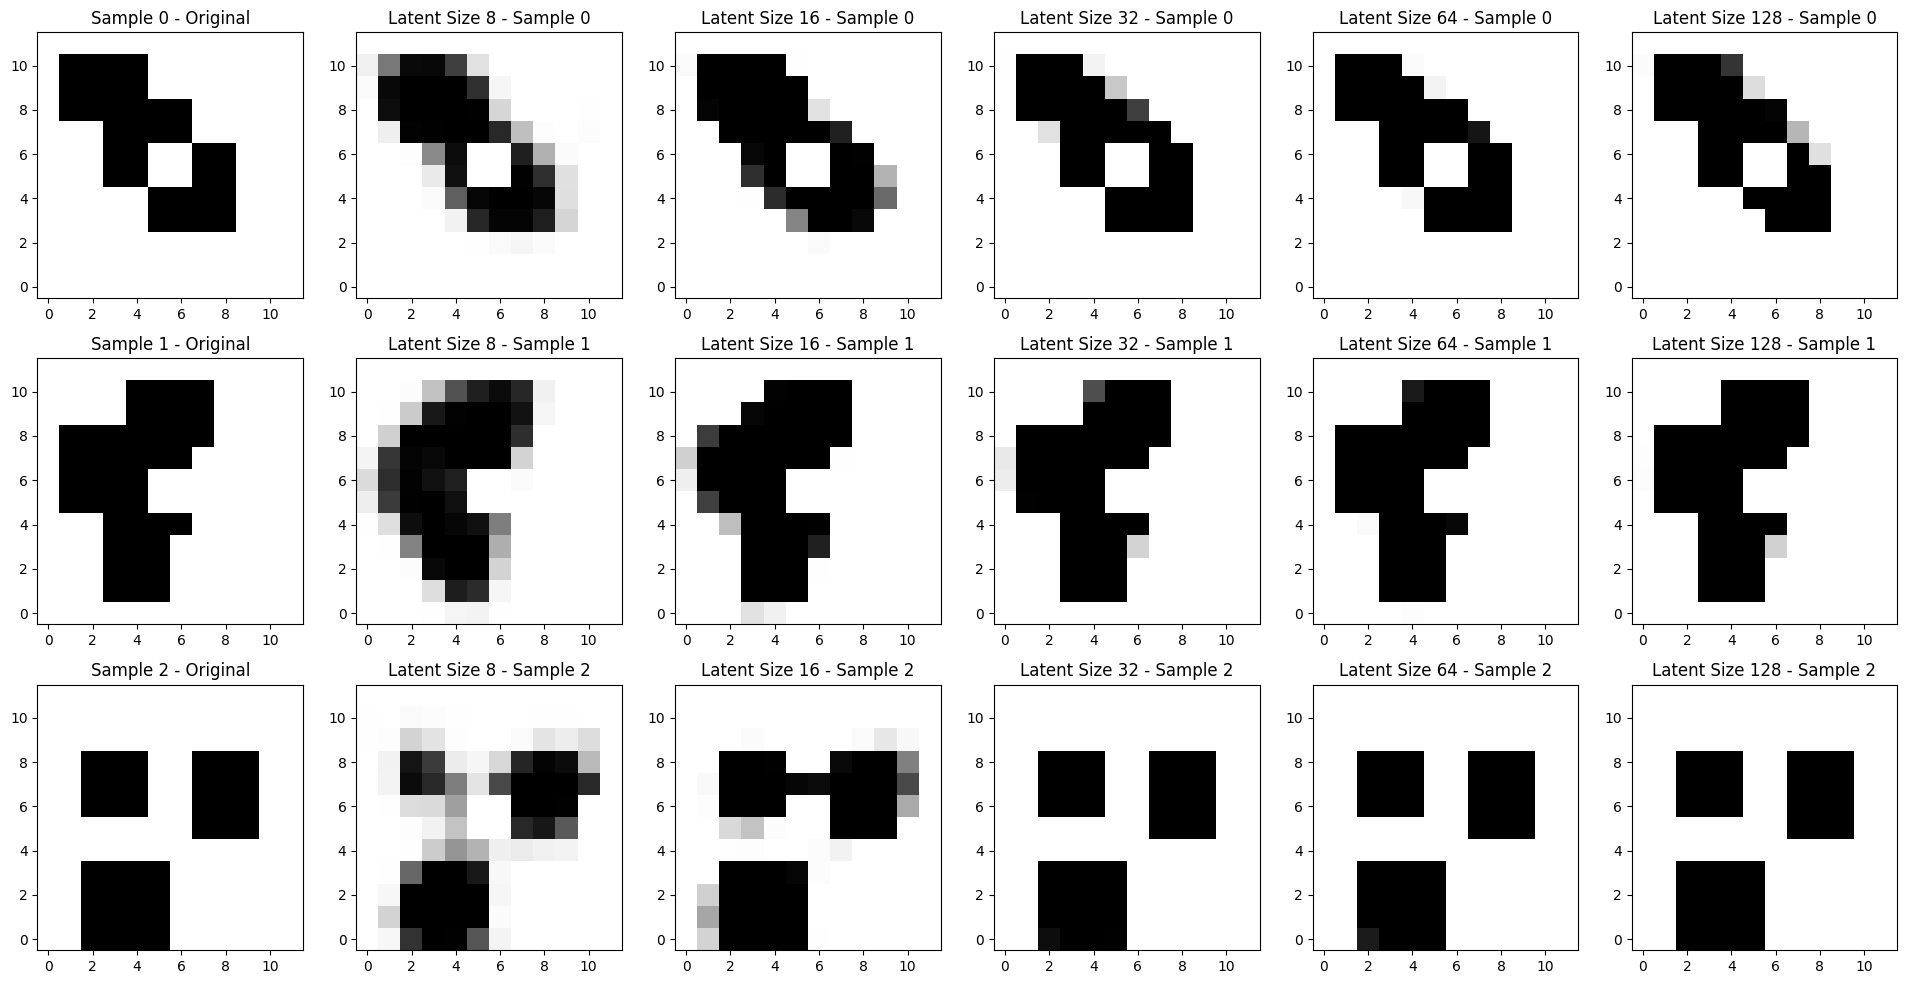

In [385]:
# Load Models & Evaluate
map_generator = OccupancyGridGenerator((12, 12), 4)

# Generate 3 maps that all models will then be evaluated on
map_samples = [Tensor(map_generator.sample()).unsqueeze(0).unsqueeze(0) for _ in range(3)]

# Plot the generated maps
# Each column will represent a different map, each row a different model

plt.figure(figsize=(24, 12))

for i, map_sample in enumerate(map_samples):
    plt.subplot(3, len(LATENT_SIZES) + 1, (i * (len(LATENT_SIZES) + 1)) + 1)
    plt.imshow(map_sample.squeeze(0).squeeze(0).detach().cpu().numpy(), cmap='gray_r', origin='lower')
    plt.title(f"Sample {i} - Original")


# Load models and evaluate
for latent_size in LATENT_SIZES:
    enc_save_path = os.path.join(os.getcwd(), f"models/big_obs_encoder_{latent_size}.pth")
    dec_save_path = os.path.join(os.getcwd(), f"models/big_obs_decoder_{latent_size}.pth")

    encoder = VariationalEncoder((12, 12), latent_size)
    decoder = CNNDecoder((12, 12), latent_size)

    encoder.load_state_dict(torch.load(enc_save_path))
    decoder.load_state_dict(torch.load(dec_save_path))

    for i, map_sample in enumerate(map_samples):
        # Run the encoder
        mean, cov = encoder.predict(map_sample)

        # Decode the latent space sample
        mean_decoded = decoder(mean)
        mean_decoded = mean_decoded.squeeze(0).squeeze(0) # Remove batch dimension
        mean_decoded = mean_decoded.detach().cpu().numpy()
        mean_decoded = np.clip(mean_decoded, 0, 1) # Clip values to [0, 1] range
        # mean_decoded = mean_decoded.T

        plt.subplot(3, len(LATENT_SIZES) + 1, (i * (len(LATENT_SIZES) + 1)) + LATENT_SIZES.index(latent_size) + 2)
        plt.imshow(mean_decoded, cmap='gray_r', origin='lower')
        plt.title(f"Latent Size {latent_size} - Sample {i}")

plt.show()